In [1]:
from random import randrange
from time import time
import matplotlib.pyplot as plt
import math

In [2]:
def max_crossing_subarray(A, low, mid, high):
    left_sum = -float('inf')
    sum = 0
    for i in range(mid, low-1, -1):
        sum += A[i]
        if sum > left_sum:
            left_sum = sum
            max_left = i
    right_sum = -float('inf')
    sum = 0
    for j in range(mid+1, high+1):
        sum += A[j]
        if sum > right_sum:
            right_sum = sum
            max_right = j
    return max_left, max_right, left_sum+right_sum

def maximum_subarray(A, low, high):
    if high == low:
        return low, high, A[low]
    else:
        mid = int((low+high)/2)
        left_low, left_high, left_sum = maximum_subarray(A, low, mid)
        right_low, right_high, right_sum = maximum_subarray(A, mid+1, high)
        cross_low, cross_high, cross_sum = max_crossing_subarray(A, low, mid, high)
        if left_sum >= right_sum and left_sum >= cross_sum:
            return left_low, left_high, left_sum
        elif right_sum >= left_sum and right_sum >= cross_sum:
            return right_low, right_high, right_sum
        else:
            return cross_low, cross_high, cross_sum

In [3]:
A = [randrange(-10, 10) for _ in range(10)]

print('Input:')
print(A)

Input:
[0, 3, 5, -4, -2, -10, 3, 8, -3, -5]


In [4]:
low, high, sum = maximum_subarray(A, 0, len(A)-1)

print('Maximum Subarray:')
print(f'- Sum {sum}')
print(f'- Index Range {low+1} to {high+1}')

Maximum Subarray:
- Sum 11
- Index Range 7 to 8


In [5]:
t = []
n = [int(10**((n+1)/2)) for n in range(0, 12)]

for i in range(len(n)):
    A = [randrange(-10, 10) for _ in range(n[i])]
    
    t0 = time()
    low, high, sum = maximum_subarray(A, 0, len(A)-1)
    t.append((time()-t0)*1000)

In [6]:
c = 1/4700
theo_t = [n[i]*math.log(n[i], 2)*c for i in range(len(n))]

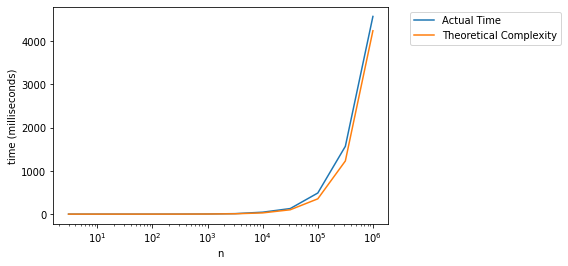

In [7]:
fig = plt.figure()
p = fig.add_subplot(1, 1, 1)
p.set_xscale('log')
p.plot(n, t, label='Actual Time')
p.plot(n, theo_t, label='Theoretical Complexity')
plt.xlabel('n')
plt.ylabel('time (milliseconds)')
plt.legend(bbox_to_anchor=(1.05, 1))
plt.show()